In [1]:
import matplotlib.pyplot as plt
import hist
import uproot

class HistFile:
    def __init__(self, fp, ana, **kwargs):
        self._file = uproot.open(fp, **kwargs)
        self._ana = ana
        self._ana_dir = self._file[self._ana]

    def keys(self):
        return [
            key.removeprefix(f'{self._ana}_').removesuffix(';1')
            for key in self._ana_dir.keys()
        ]

    def __getitem__(self, item):
        if item in self._ana_dir:
            return self._ana_dir[item]
        if item in self._file:
            return self._file[item]
        return self._ana_dir[f'{self._ana}_{item}']

In [2]:
f = HistFile('hist.root', 'Tracking4EaTStudy')

In [3]:
f.keys()

['n_tracks',
 'n_clean_tracks',
 'sub_leading_momentum',
 'track_state_at_ecal',
 'rec_momentum',
 'sim_momentum',
 'sim_momentum_no_clean_tracks',
 'rec_momentum_sim_momentum',
 'impact_point']

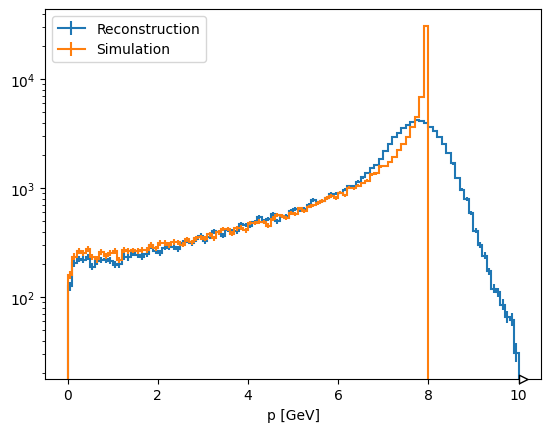

In [4]:
f['rec_momentum'].to_hist().plot(label='Reconstruction')
f['sim_momentum'].to_hist().plot(label='Simulation')
plt.yscale('log')
plt.legend()
plt.show()

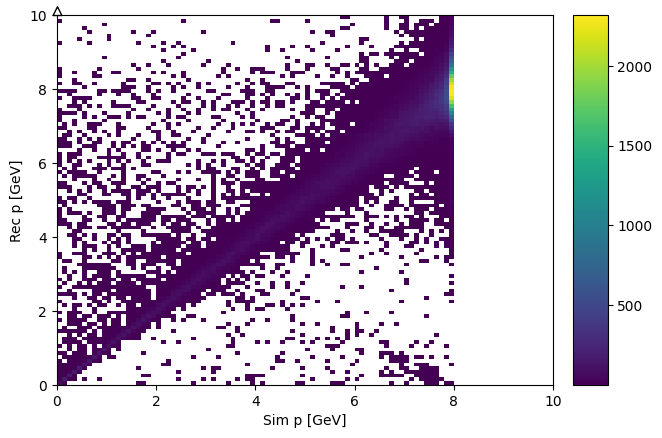

In [5]:
f['rec_momentum_sim_momentum'].to_hist().plot(cmin=1)
plt.show()